<a href="https://colab.research.google.com/github/NandakrishnanR/Kaggle_projects/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
data["age"].describe()
fig=px.histogram(data,x="age",nbins=47)
fig.show()



In [ ]:
data.sex.describe()
fig=px.histogram(data,x="charges",color="smoker",nbins=47)
fig.show()

In [ ]:
smoker_values={'no':0,'yes':1}
data["smoker_func"]=data["smoker"].map(smoker_values)

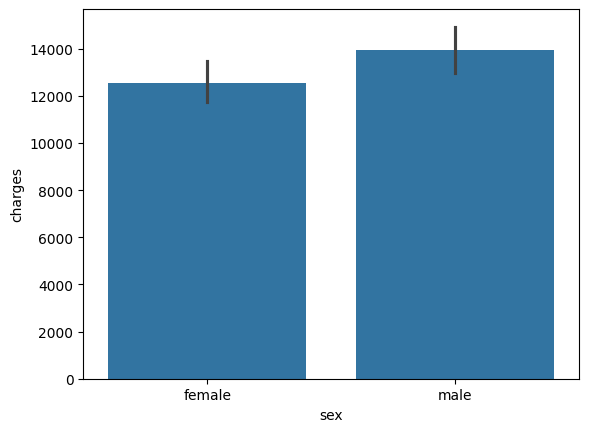

In [ ]:
sns.barplot(x="sex", y="charges", data=data)
# Use lambda with apply to map 'male' to 1 and others to 0
data["new_sex"] = data["sex"].apply(lambda x: 1 if x == "male" else 0)

In [ ]:
c1=data.charges.corr(data.smoker_func)
print(c1)
c2=data.charges.corr(data.bmi)
print(c2)
c3=data.charges.corr(data.age)
print(c3)

0.787251430498478
0.19834096883362895
0.2990081933306476


In [ ]:
data.corr(numeric_only=True)

,age,bmi,children,charges,smoker_func,new_sex
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292
smoker_func,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185
new_sex,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000


In [ ]:
!pip install scikit-learn --quiet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
model=LinearRegression()
model1=SGDRegressor()

In [ ]:
non_smoker_data = data[data["smoker_func"] == 0]
X = non_smoker_data[["age","bmi","children"]]
y = non_smoker_data[["charges"]]
model.fit(X, y)
prediction=model.predict(X)
print(prediction)

[[2724.94209163]
 [6535.13457204]
 [6065.27173951]
 ...
 [2134.51524931]
 [2160.54349555]
 [2898.08585583]]


In [ ]:
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(y,prediction))

4608.470405038247


In [ ]:
#now just trying to fit entire dataset
total_X=data[["age","children","bmi","smoker_func","new_sex"]]
total_y=data[["charges"]]
model.fit(total_X,total_y)
total_prediction=model.predict(total_X)
print(total_prediction)
print(root_mean_squared_error(total_y,total_prediction))

[[25661.85689486]
 [ 3818.77858262]
 [ 7096.73025538]
 ...
 [ 4465.88909619]
 [ 1676.96948913]
 [36863.89250792]]
6056.100708754546


In [ ]:
import pandas as pd

# Perform one-hot encoding on the 'region' column
region_dummies = pd.get_dummies(data['region'], prefix='region')

# Concatenate the new dummy columns with the original DataFrame
data = pd.concat([data, region_dummies], axis=1)

# Display the first few rows to see the new columns
display(data.head())

,age,sex,bmi,children,smoker,region,charges,smoker_func,new_sex,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,False,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,0,1,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,0,1,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,0,1,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,0,1,False,True,False,False


In [ ]:
#now just trying to fit entire dataset
total_X=data[["age","children","bmi","smoker_func","new_sex","region_northeast","region_northwest","region_southeast","region_southwest"]]
total_y=data[["charges"]]
model.fit(total_X,total_y)
total_prediction=model.predict(total_X)
print(total_prediction)
print(root_mean_squared_error(total_y,total_prediction))

[[25293.7130284 ]
 [ 3448.60283431]
 [ 6706.9884907 ]
 ...
 [ 4149.13248568]
 [ 1246.58493898]
 [37085.62326757]]
6041.6796511744515
